In [23]:
import numpy as np
import matplotlib as plt
import scipy

import sys
sys.path.append('../utils')
sys.path.append('../dFC')
import widefield_utils
import connectivity_measures

from sklearn.decomposition import FastICA

In [24]:
#names = ["NXAK22.1A","NXAK14.1A","NXAK7.1B","NXAK4.1B","NRXN78.1D","NRXN78.1A"]
#names_knock = ["NXAK24.1C","NXAK20.1B","NXAK16.1B","NXAK10.1A","NXAK4.1A","NRXN71.2A"]

#for name in names+names_knock:
name = "NXAK22.1A"
n = 5000
n_comp = 50
base_directory = r"/home/k21208334/calcium_analyses/data/" + name + "/"
sample = widefield_utils.get_delta_f_sample_from_svd_unprocessed(base_directory,0,n)
sample.reshape((300*304,n))

SVT Shape (200, 25498)
U Shape (300, 304, 200)
Delta F Sample (300, 304, 5000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
X = sample.reshape((300*304,n))
model = FastICA(n_components = n_comp)
S = model.fit_transform(np.transpose(X)) # started 10.04

/home/k21208334/.conda/envs/calcium_analyses/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [28]:
a = model.mixing_
a.shape

(91200, 10)

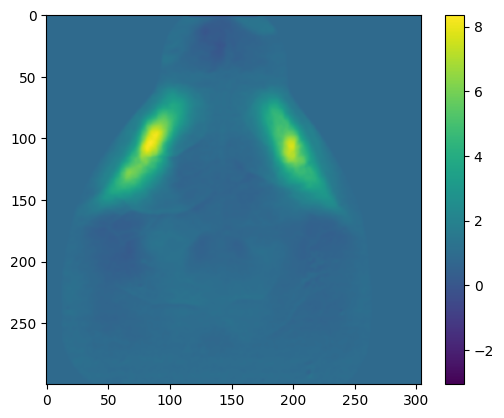

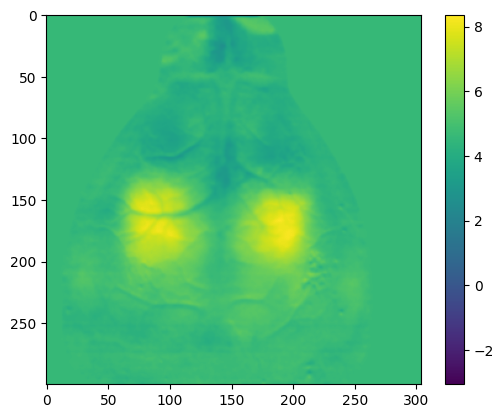

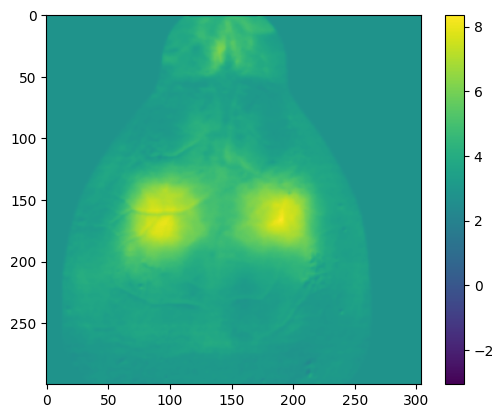

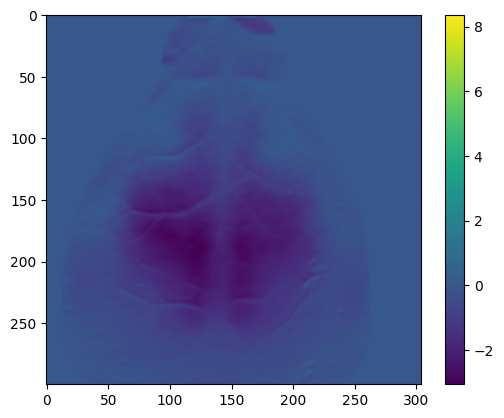

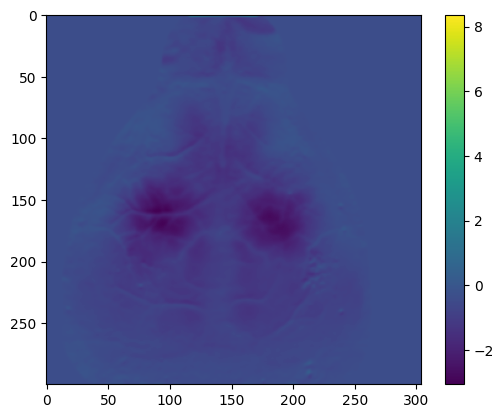

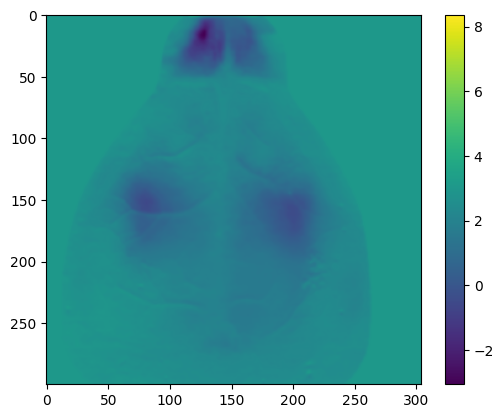

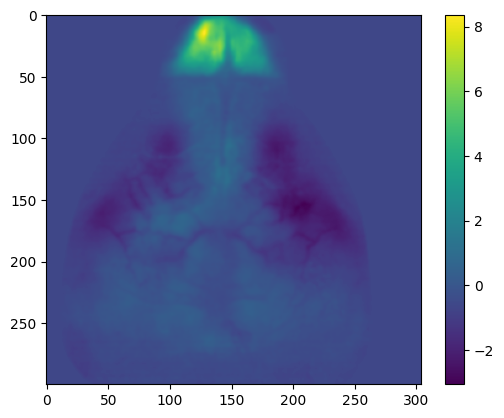

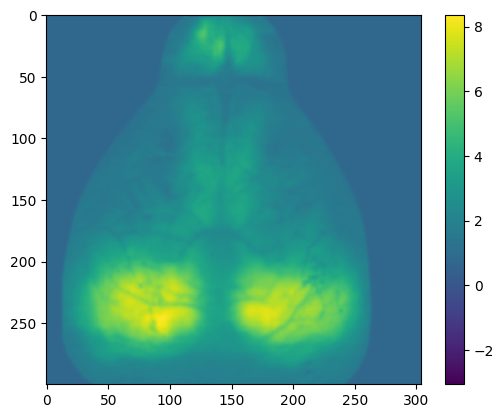

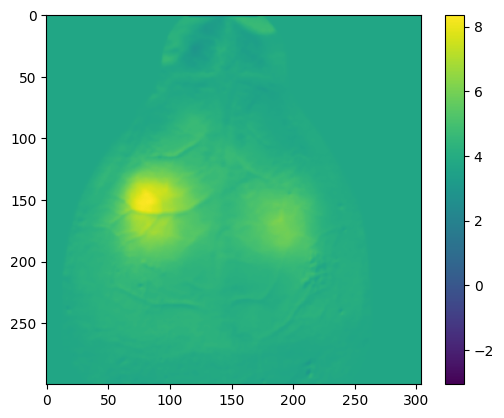

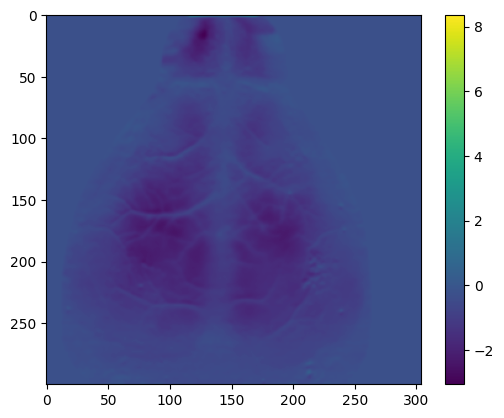

In [29]:
for i in range(n_comp):
    fig,axx = plt.pyplot.subplots()
    axx.imshow(a[:,i].reshape((300,304)))
    m = plt.cm.ScalarMappable()
    m.set_clim(vmin=a.min(), vmax=a.max())
    fig.colorbar(m,ax=axx)

/tmp/ipykernel_4123336/4247972693.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.pyplot.subplots()


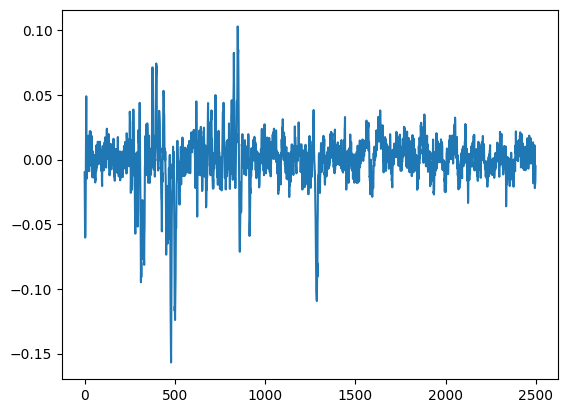

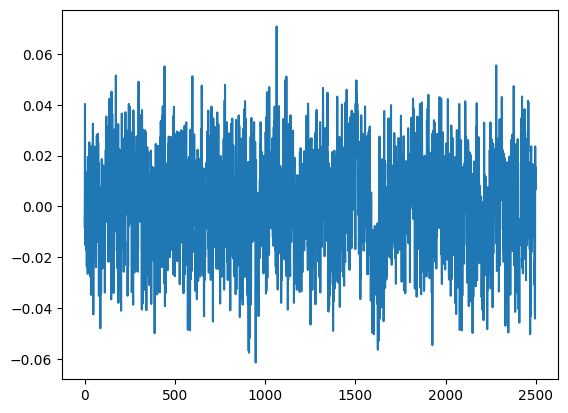

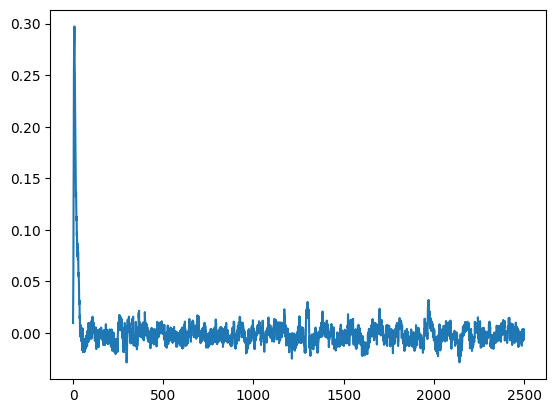

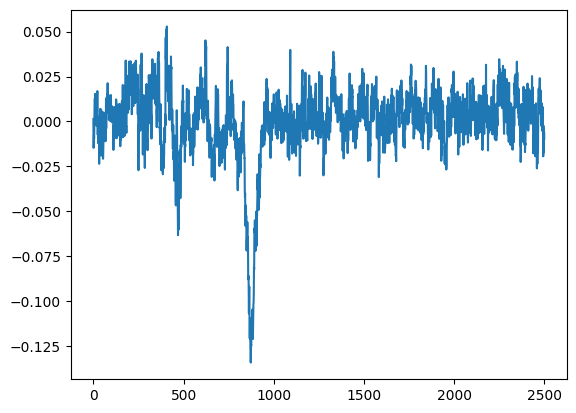

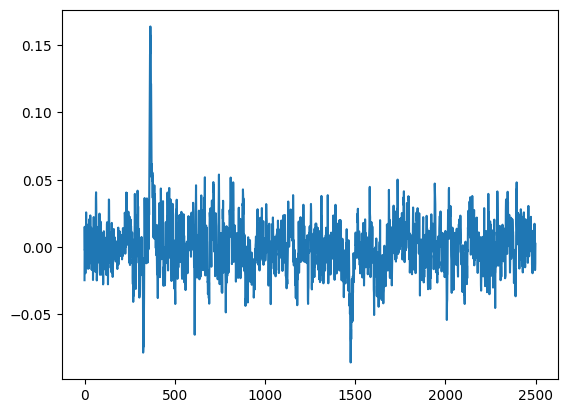

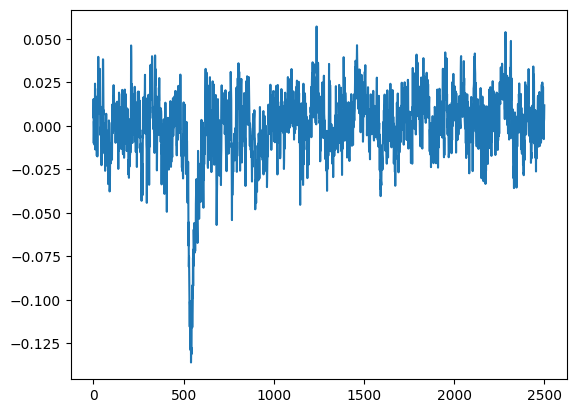

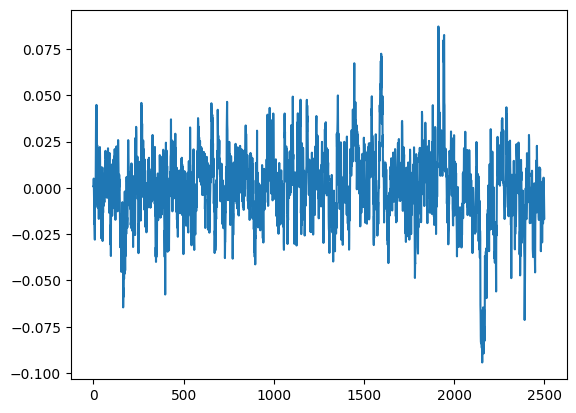

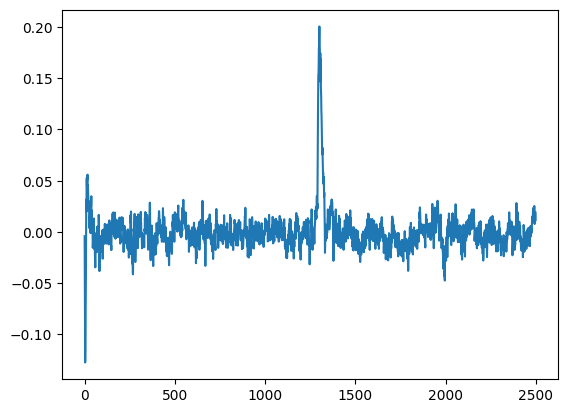

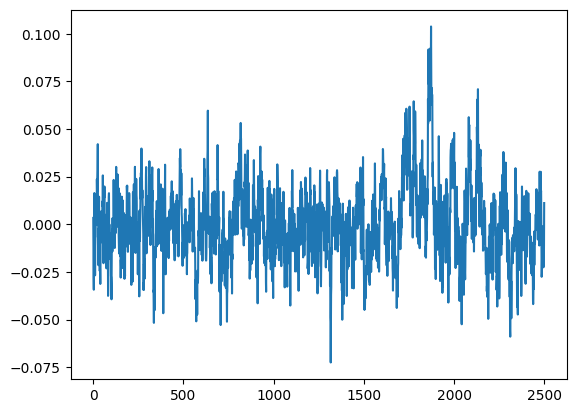

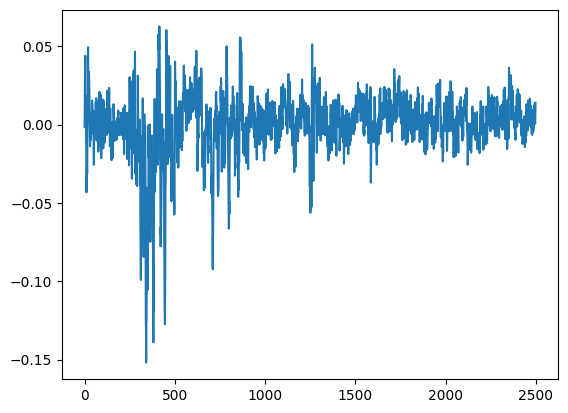

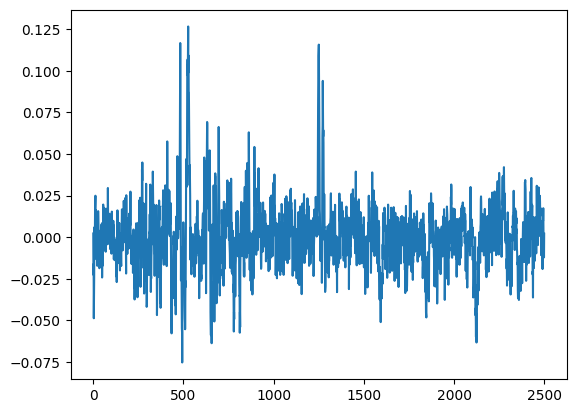

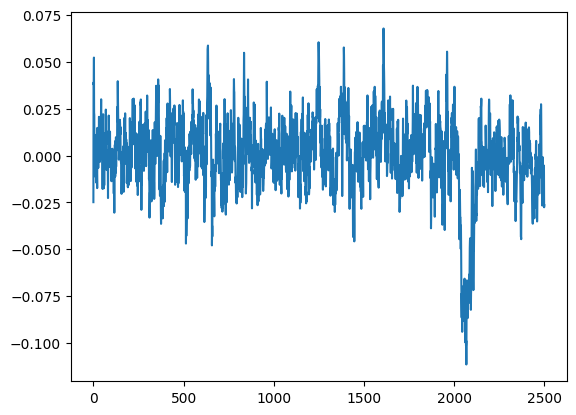

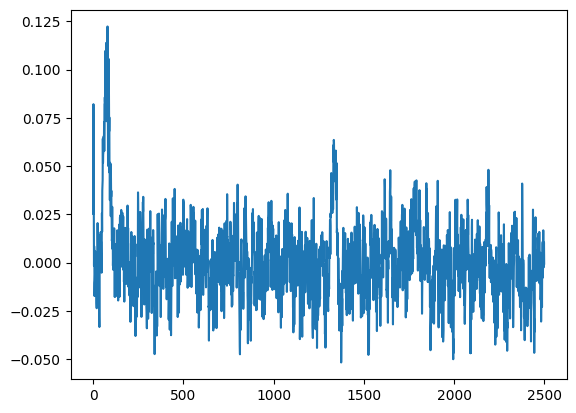

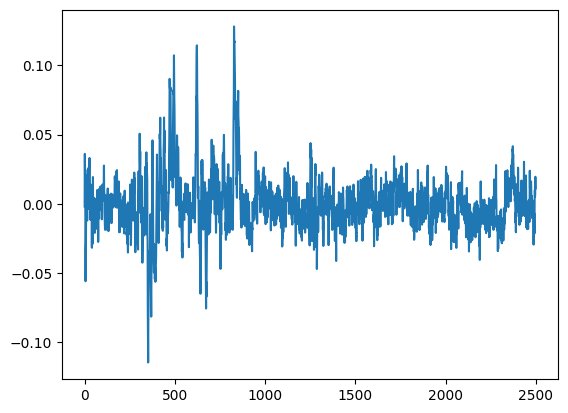

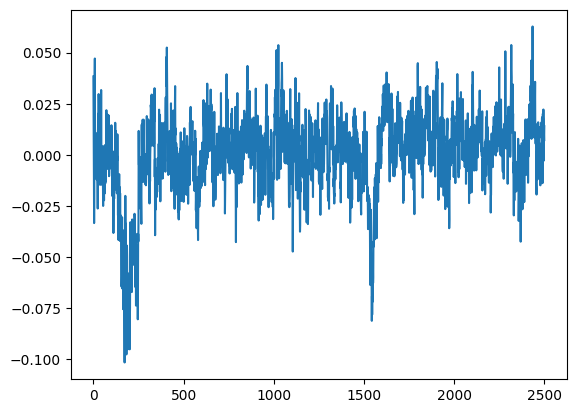

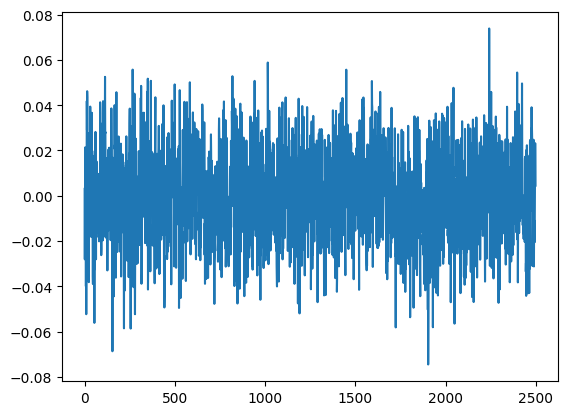

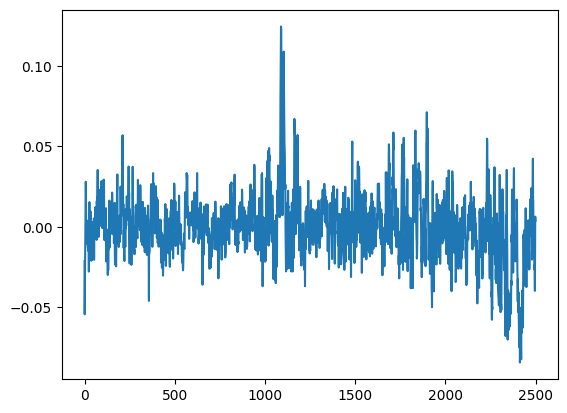

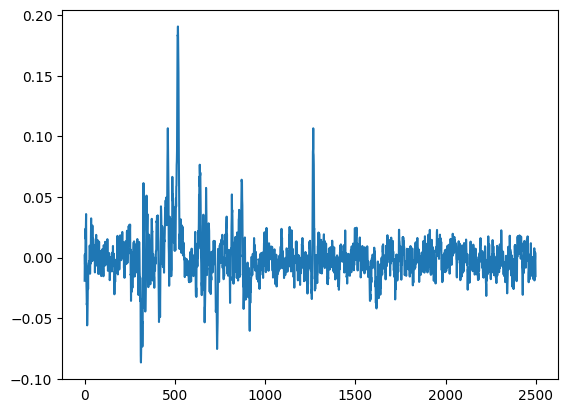

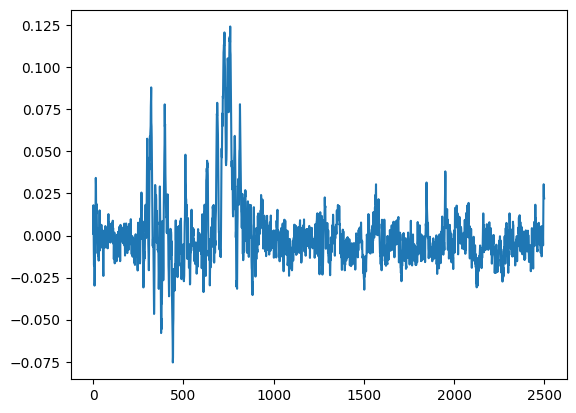

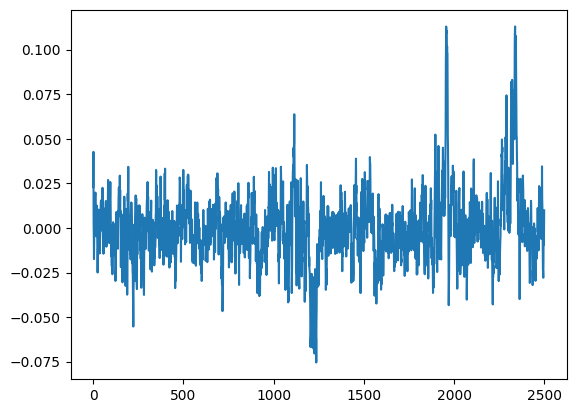

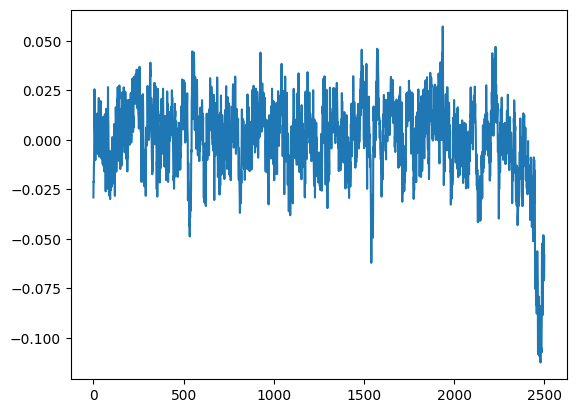

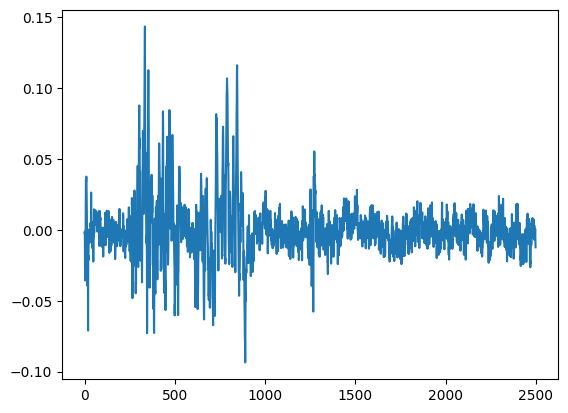

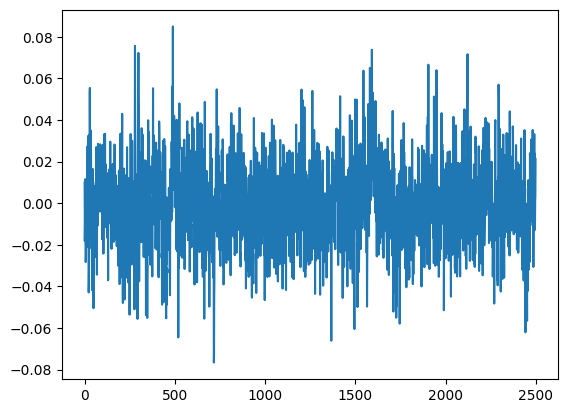

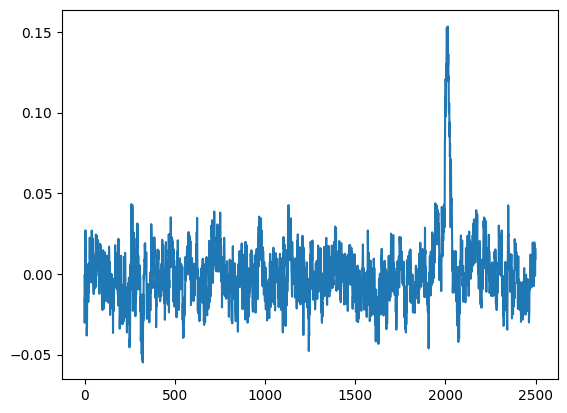

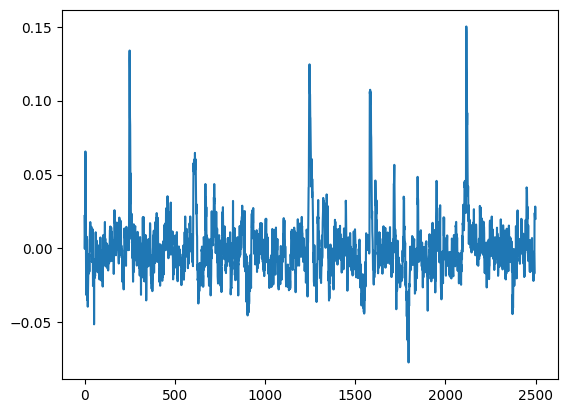

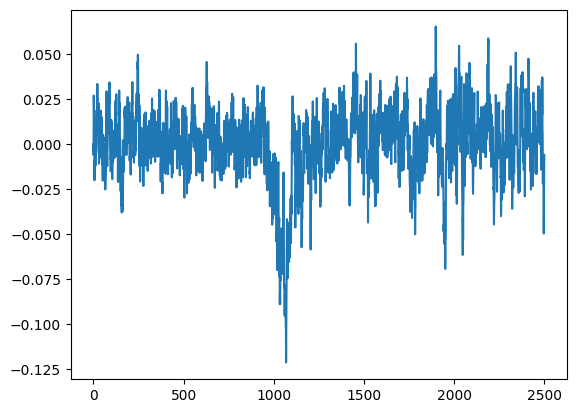

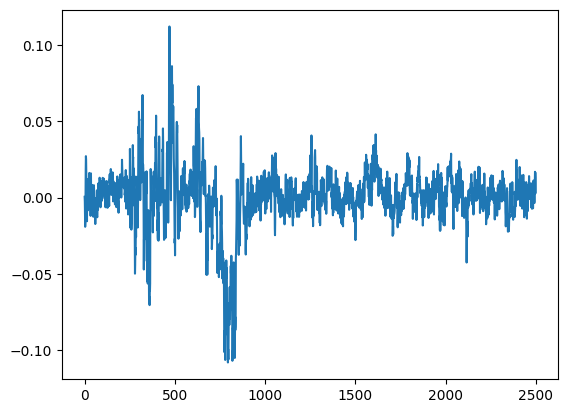

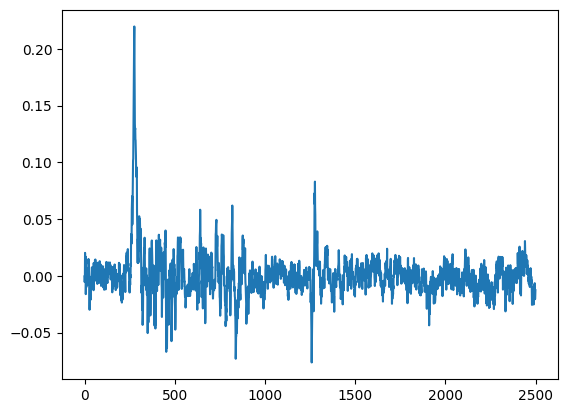

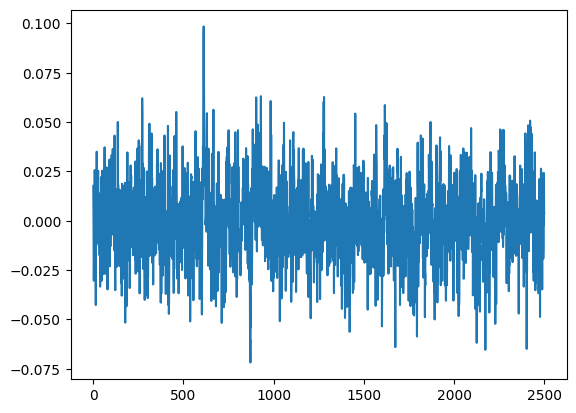

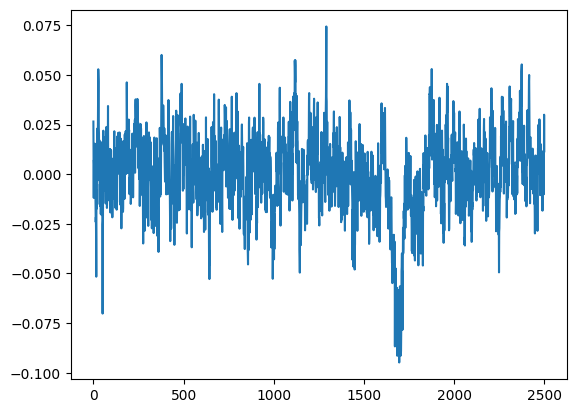

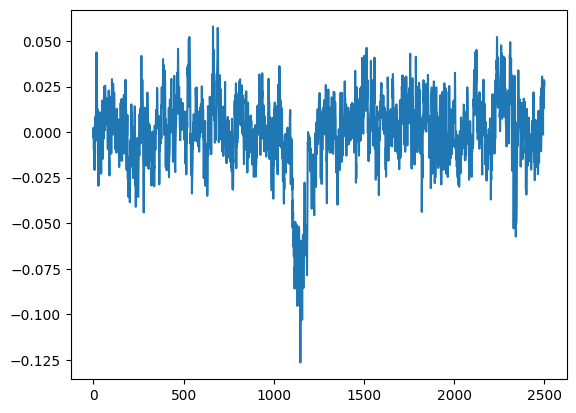

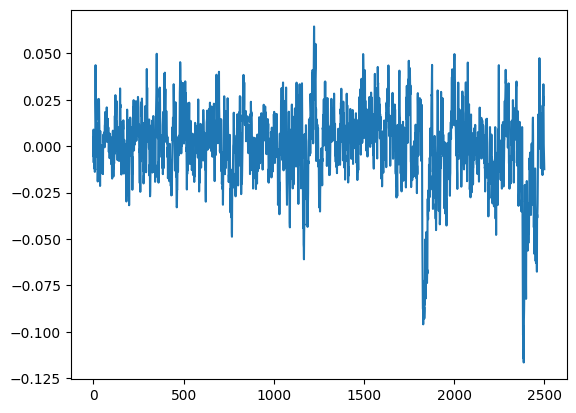

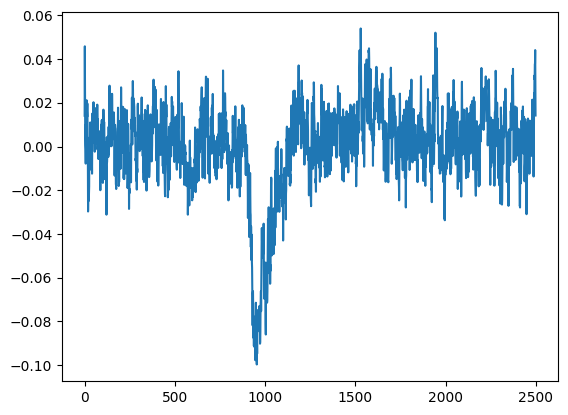

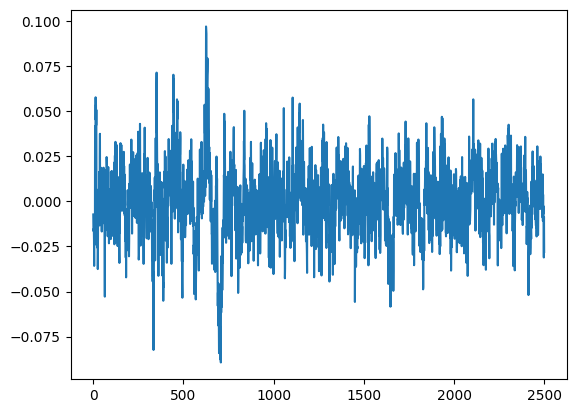

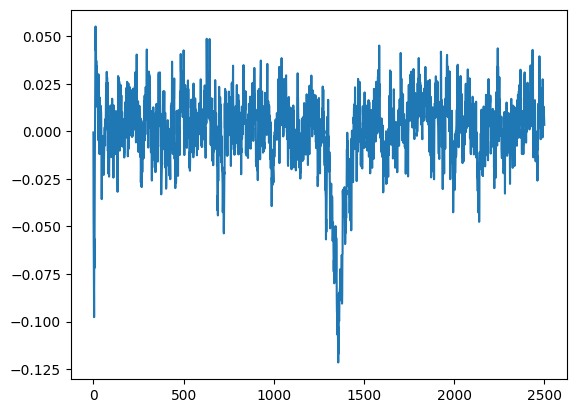

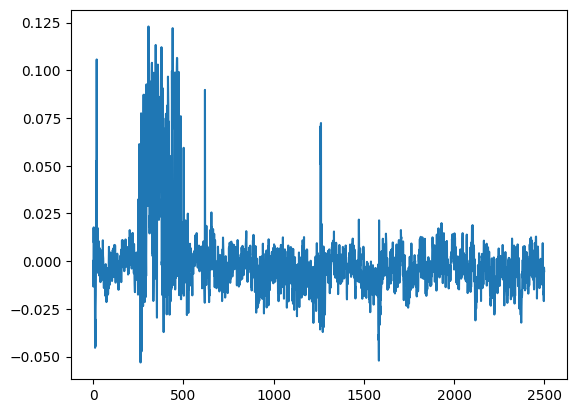

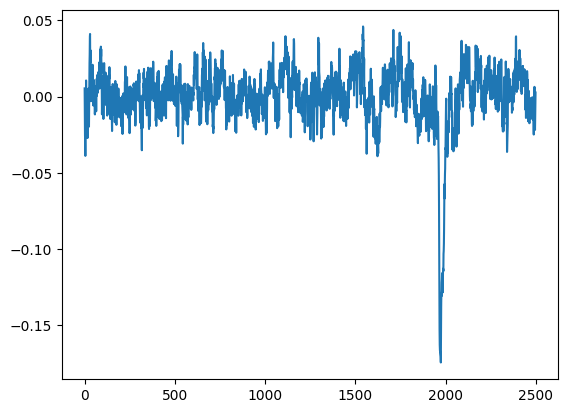

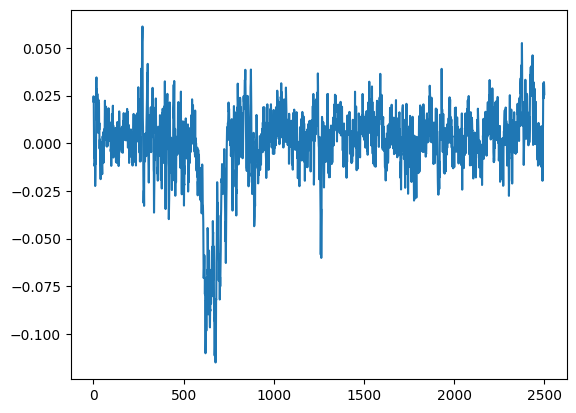

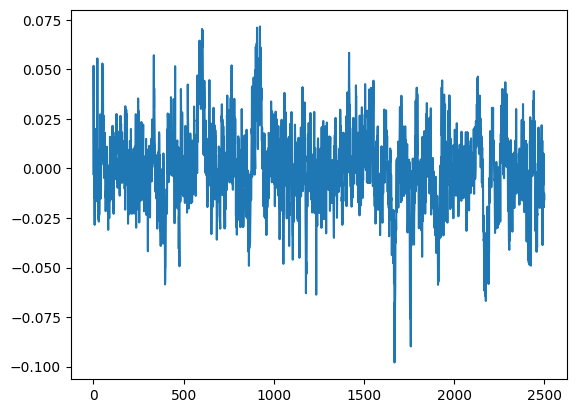

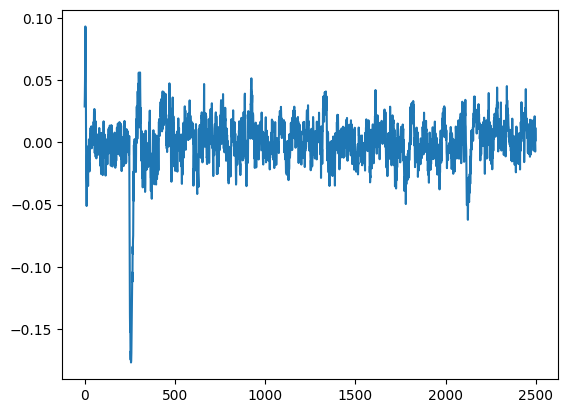

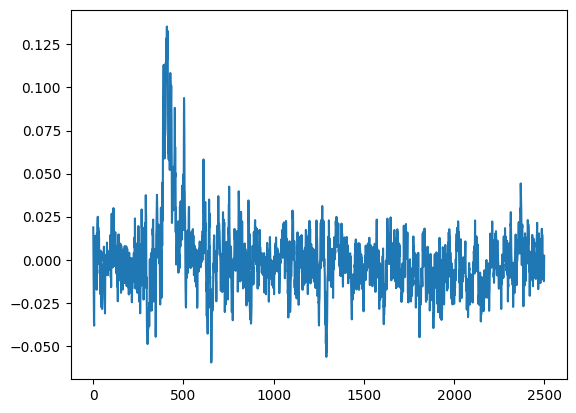

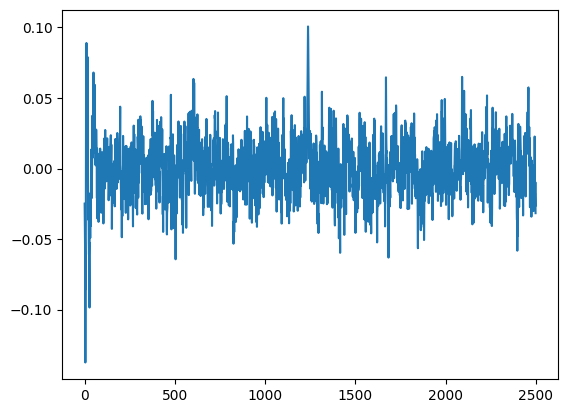

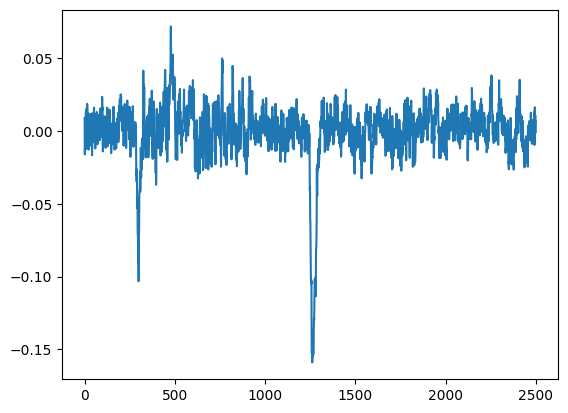

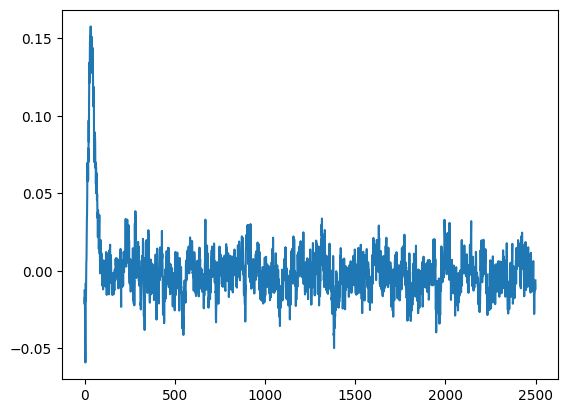

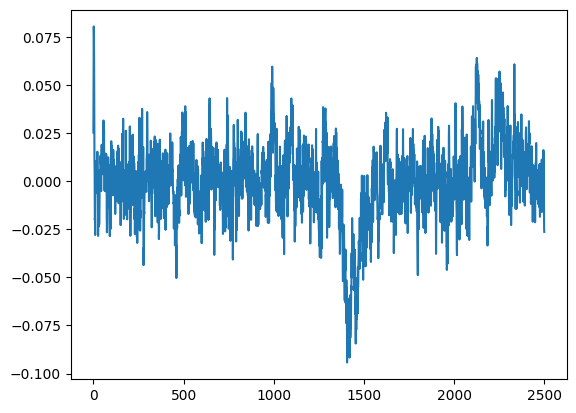

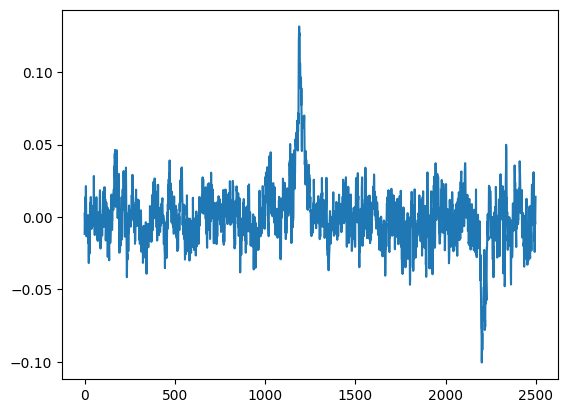

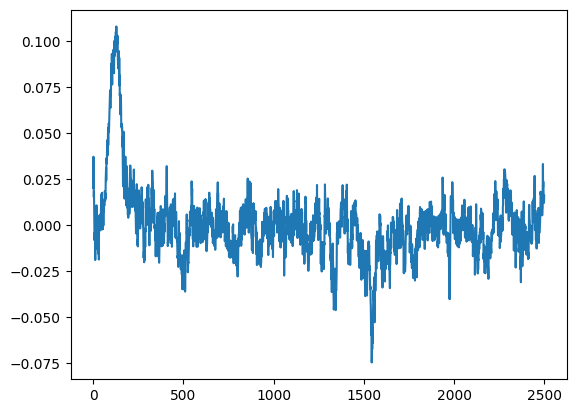

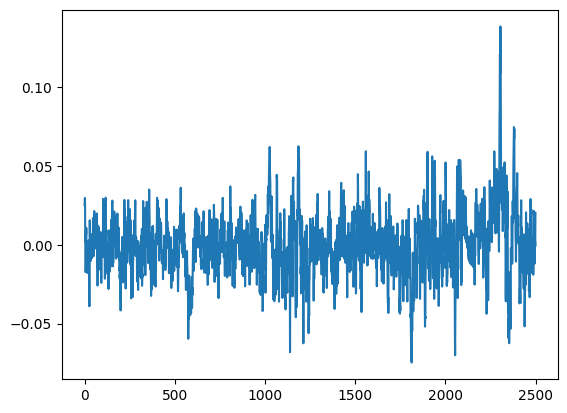

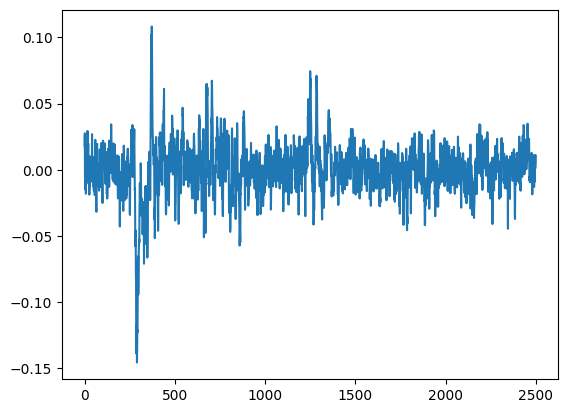

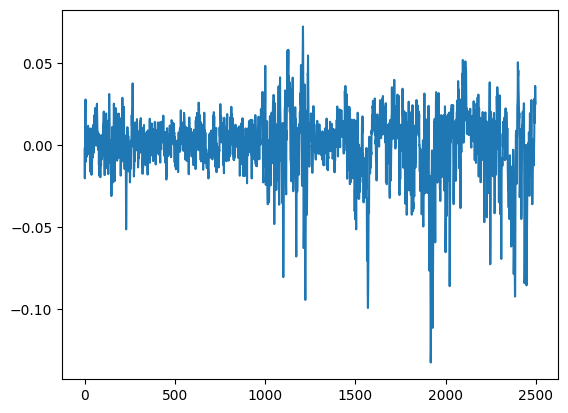

In [22]:
for i in range(50):
    fig,ax = plt.pyplot.subplots()
    ax.plot(S[:,i])

In [26]:
n_comp = 10